In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [4]:
shunt_pxi_csv_path = '../data/shunt_pxi.csv'
shunt_pxi_df = pd.read_csv(shunt_pxi_csv_path, sep=',', header=0, dtype={'keithley_195A_mV': np.float64})
shunt_pxi_df.head()

,spd3303c_current_A,psx_4110_mA,keithley_195A_mV
0,0.1,100.90,4.29
1,0.2,198.80,8.45
2,0.3,296.30,12.60
3,0.4,402.25,17.02
4,0.5,498.70,21.09


In [5]:
shunt_pxi_df['voltage']=shunt_pxi_df['keithley_195A_mV']/1000
shunt_pxi_df['current']=shunt_pxi_df['psx_4110_mA']/1000
shunt_pxi_df.head()

,spd3303c_current_A,psx_4110_mA,keithley_195A_mV,voltage,current
0,0.1,100.90,4.29,0.00429,0.10090
1,0.2,198.80,8.45,0.00845,0.19880
2,0.3,296.30,12.60,0.01260,0.29630
3,0.4,402.25,17.02,0.01702,0.40225
4,0.5,498.70,21.09,0.02109,0.49870


In [10]:
shunt_model = smf.ols(formula='voltage ~ current -1', data=shunt_pxi_df)

In [11]:
res = shunt_model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                voltage   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.445e+05
Date:                Sat, 24 Aug 2024   Prob (F-statistic):                    6.34e-42
Time:                        10:54:59   Log-Likelihood:                          129.17
No. Observations:                  20   AIC:                                     -256.3
Df Residuals:                      19   BIC:                                     -255.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

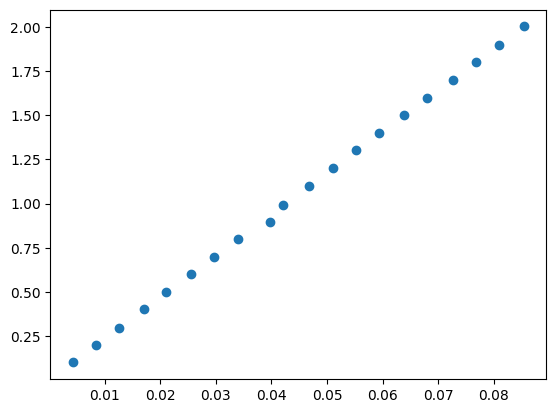

In [12]:
fig, ax = plt.subplots()
ax.scatter(shunt_pxi_df['voltage'], shunt_pxi_df['current'])

TypeError: plot_regress_exog() missing 1 required positional argument: 'exog_idx'